#1. Exploratory Data Analysis.

## 1.1 Import Packages.

In [1]:
!pip install catboost

In [57]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier, StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from plotly import express as px

# Set plot style
sns.set(color_codes=True)

##1.2 Loading data with Pandas

In [3]:
data = pd.read_csv("Customer_Churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##1.3 Descriptive statistics of data

###1.3.1 Data Types
It is useful to first understand the data that we are dealing with along with the data types of each
column. The data types may dictate how we transform and engineer features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###1.3.2 Statistics
statistics about the datasets

In [6]:
# Convert the 'TotalCharges' column to numeric, and set non-numeric values to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Find and display the unique categorical values
categorical_values = data['TotalCharges'][data['TotalCharges'].isna()].unique()

print("Unique Categorical Values in the 'TotalCharges' column:")
for value in categorical_values:
    print(value)
df = pd.DataFrame(data)

Unique Categorical Values in the 'TotalCharges' column:
nan


In [7]:
# The size of the data set
data.shape

(7043, 21)

In [8]:
data.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
5%,0.000000,1.000000,19.650000,49.605000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
90%,1.000000,69.000000,102.600000,5976.640000
95%,1.000000,72.000000,107.400000,6923.590000


In [9]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Churn"]

categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [10]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
# Customers leaving the bank
churn = data.loc[data["Churn"]=="Yes"]

In [12]:
# Customers who did not leave the bank
not_churn = data.loc[data["Churn"]=="No"]

#Churn (Dependent Variable)

In [13]:
# Frequency of classes of dependent variable
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##Categorical Variables

Let's find the relation between the categorical variable and churn values.How many customers had affected by this categorical variables.

Columns : 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'

In [14]:
# Frequency of not_churn group according to 'gender'
not_churn['gender'].value_counts().sort_values()
# Frequency of churn group according to 'gender'
churn['gender'].value_counts().sort_values()

# 'SeniorCitizen'
not_churn['SeniorCitizen'].value_counts().sort_values()
churn['SeniorCitizen'].value_counts().sort_values()

# 'Partner'
not_churn['Partner'].value_counts().sort_values()
churn['Partner'].value_counts().sort_values()

# 'Dependents'
not_churn['Dependents'].value_counts().sort_values()
churn['Dependents'].value_counts().sort_values()

# 'PhoneService'
not_churn['PhoneService'].value_counts().sort_values()
churn['PhoneService'].value_counts().sort_values()

# 'MultipleLines'
not_churn['MultipleLines'].value_counts().sort_values()
churn['MultipleLines'].value_counts().sort_values()

# 'InternetService'
not_churn['InternetService'].value_counts().sort_values()
churn['InternetService'].value_counts().sort_values()

# 'OnlineSecurity'
not_churn['OnlineSecurity'].value_counts().sort_values()
churn['OnlineSecurity'].value_counts().sort_values()

# 'OnlineBackup'
not_churn['OnlineBackup'].value_counts().sort_values()
churn['OnlineBackup'].value_counts().sort_values()

# 'DeviceProtection'
not_churn['DeviceProtection'].value_counts().sort_values()
churn['DeviceProtection'].value_counts().sort_values()

# 'TechSupport'
not_churn['TechSupport'].value_counts().sort_values()
churn['TechSupport'].value_counts().sort_values()

# 'StreamingTV'
not_churn['StreamingTV'].value_counts().sort_values()
churn['StreamingTV'].value_counts().sort_values()

# 'StreamingMovies'
not_churn['StreamingMovies'].value_counts().sort_values()
churn['StreamingMovies'].value_counts().sort_values()

# 'Contract'
not_churn['Contract'].value_counts().sort_values()
churn['Contract'].value_counts().sort_values()

# 'PaperlessBilling'
not_churn['PaperlessBilling'].value_counts().sort_values()
churn['PaperlessBilling'].value_counts().sort_values()

# 'PaymentMethod'
not_churn['PaymentMethod'].value_counts().sort_values()
churn['PaymentMethod'].value_counts().sort_values()


Credit card (automatic)       232
Bank transfer (automatic)     258
Mailed check                  308
Electronic check             1071
Name: PaymentMethod, dtype: int64

In [15]:
# Create a dictionary to store the results for each column
results = {}

# Define the list of columns
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod']

# Loop through the columns and collect the frequency counts for both "Churn" and "Not Churn"
for column in columns:
    not_churn_counts = not_churn[column].value_counts().sort_values()
    churn_counts = churn[column].value_counts().sort_values()

    results[column] = {
        'Not Churn': not_churn_counts,
        'Churn': churn_counts
    }

# Create visualizations for each column using Plotly
for column, df in results.items():
    fig = px.bar(df['Not Churn'], x=df['Not Churn'].index, y=df['Not Churn'], title=f'Frequency of Categories for {column} (Not Churn)')
    fig.update_layout(xaxis_title='Category', yaxis_title='Count')
    fig.show()

    fig = px.bar(df['Churn'], x=df['Churn'].index, y=df['Churn'], title=f'Frequency of Categories for {column} (Churn)')
    fig.update_layout(xaxis_title='Category', yaxis_title='Count')
    fig.show()

##Numerical Variables

##tenure


In [16]:
# Let's examine the credit score of the not_churn group
not_churn["tenure"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
5%          2.000000
25%        15.000000
50%        38.000000
75%        61.000000
90%        71.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64

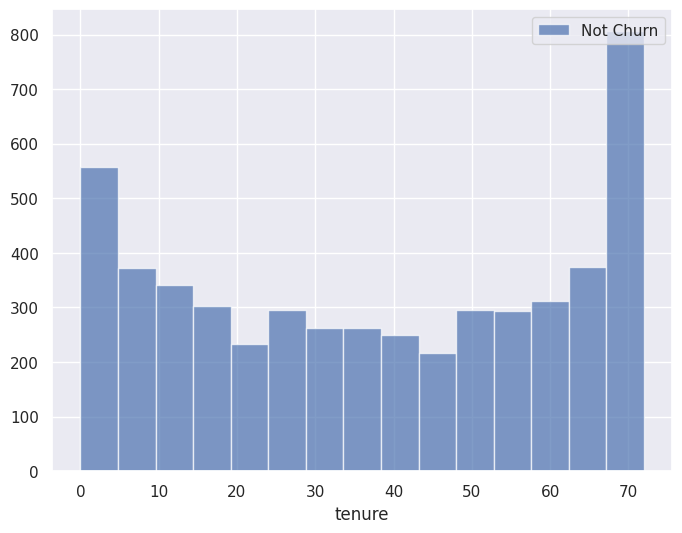

In [17]:
# distribution of the Credit Score for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('tenure')
plt.hist(not_churn["tenure"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [18]:
# Let's examine the credit score of the churn group
churn['tenure'].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
5%          1.000000
25%         2.000000
50%        10.000000
75%        29.000000
90%        51.000000
95%        60.000000
99%        70.000000
max        72.000000
Name: tenure, dtype: float64

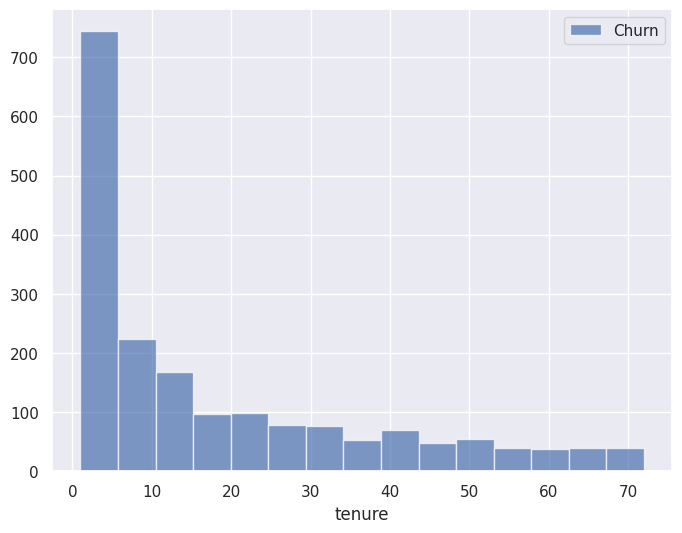

In [19]:
# distribution of the Credit Score for churn
plt.figure(figsize=(8,6))
plt.xlabel('tenure')
plt.hist(churn["tenure"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

##MonthlyCharges

In [20]:
# Let's examine the credit score of the not_churn group
not_churn["MonthlyCharges"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
5%         19.600000
25%        25.100000
50%        64.425000
75%        88.400000
90%       103.135000
95%       108.417500
99%       115.100000
max       118.750000
Name: MonthlyCharges, dtype: float64

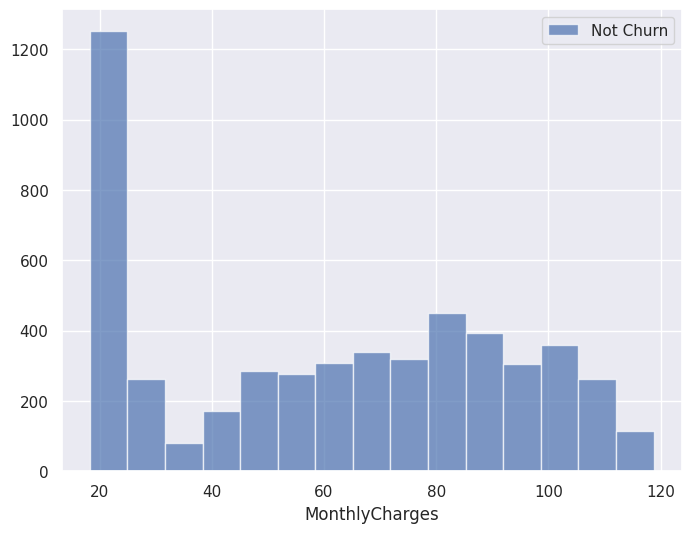

In [21]:
# distribution of the Credit Score for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('MonthlyCharges')
plt.hist(not_churn["MonthlyCharges"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [22]:
# Let's examine the credit score of the churn group
churn["MonthlyCharges"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
5%         20.620000
25%        56.150000
50%        79.650000
75%        94.200000
90%       101.770000
95%       105.610000
99%       111.132000
max       118.350000
Name: MonthlyCharges, dtype: float64

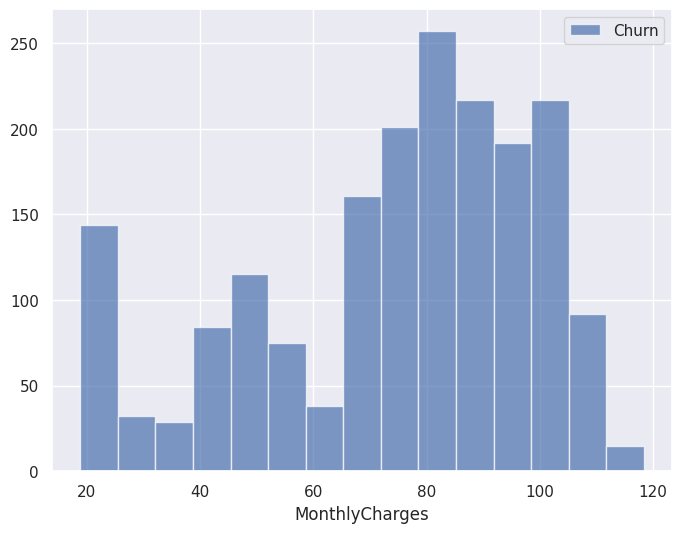

In [23]:
# distribution of the Credit Score for churn
plt.figure(figsize=(8,6))
plt.xlabel('MonthlyCharges')
plt.hist(churn["MonthlyCharges"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

#TotalCharges

In [24]:
# Let's examine the credit score of the Not churn group
not_churn["TotalCharges"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
5%         61.060000
25%       577.825000
50%      1683.600000
75%      4264.125000
90%      6293.100000
95%      7128.395000
99%      8138.040000
max      8672.450000
Name: TotalCharges, dtype: float64

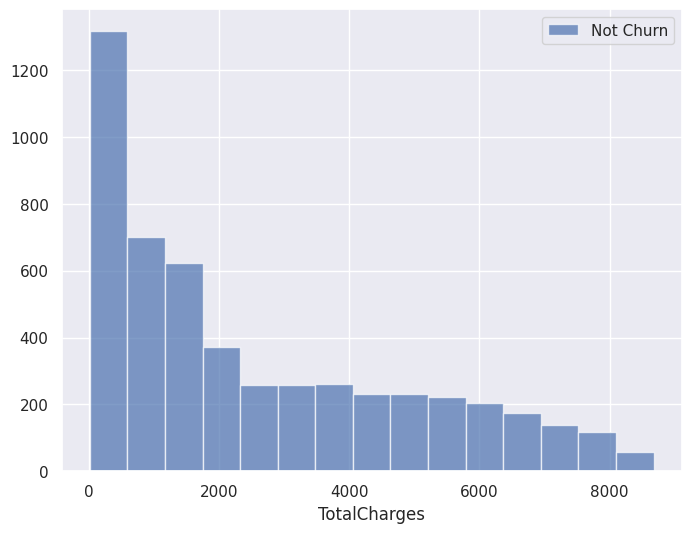

In [25]:
# distribution of the Credit Score for Not churn
plt.figure(figsize=(8,6))
plt.xlabel('TotalCharges')
plt.hist(not_churn["TotalCharges"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Let's examine the credit score of the churn group
churn["TotalCharges"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
5%         36.120000
25%       134.500000
50%       703.550000
75%      2331.300000
90%      4556.790000
95%      5890.050000
99%      7436.802000
max      8684.800000
Name: TotalCharges, dtype: float64

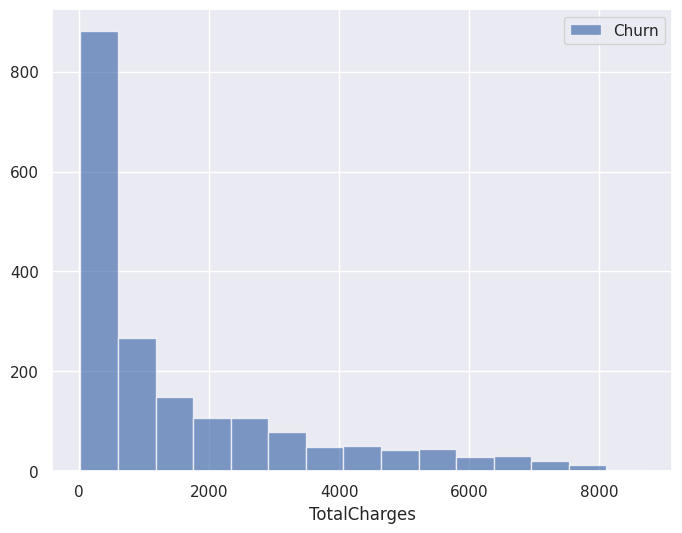

In [27]:
# distribution of the Credit Score for churn
plt.figure(figsize=(8,6))
plt.xlabel('TotalCharges')
plt.hist(churn["TotalCharges"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

#1.4 Data Vusualization

In [28]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, title, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained customers using Plotly Express.
    """
    # Create a temporal DataFrame with the data to be plotted
    temp = dataframe.copy()
    temp['Retention'] = temp['Churn'].apply(lambda x: 'Retention' if x == 0 else 'Churn')

    # Create the histogram using Plotly Express
    fig = px.histogram(
        temp,
        x=column,
        color='Retention',
        nbins=bins_,
        title=title
    )

    # Show the plot
    fig.show()

### 1.4.1 Churn

In [29]:
churn = data[['customerID', 'Churn']]
churn.columns = ['Companies', 'Churn']
churn_total = churn.groupby(churn['Churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

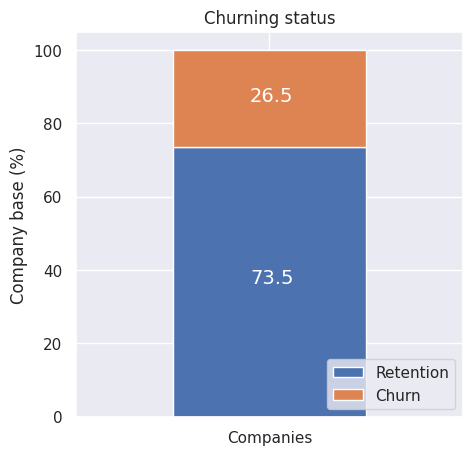

In [30]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 26% of the total customer have churn.

In [31]:
channel = data[['customerID', 'Contract', 'Churn']]
channel = channel.groupby([channel['Contract'], channel['Churn']])['customerID'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=['Yes'], ascending=False)

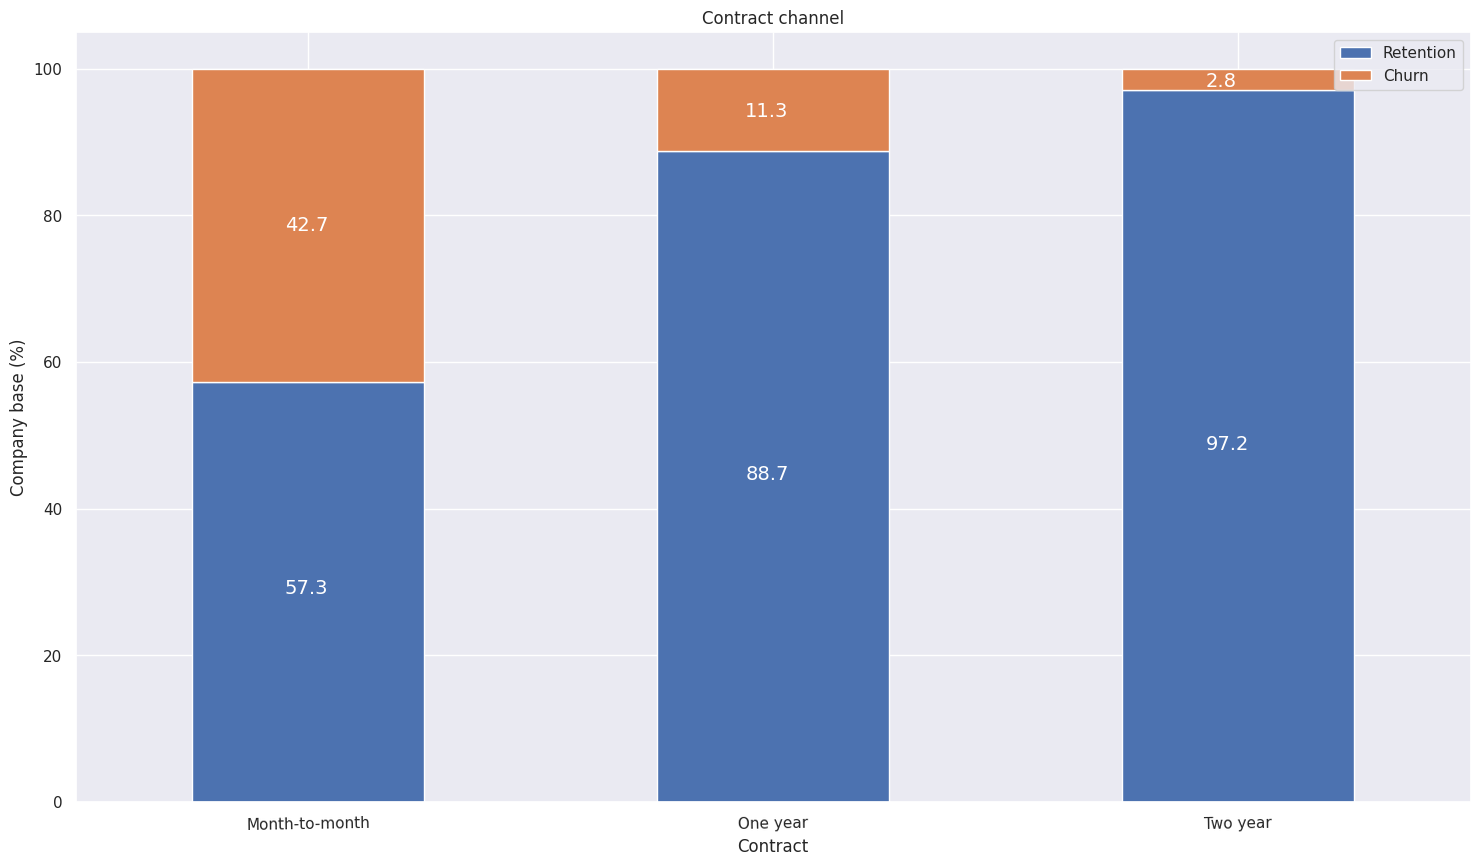

In [32]:
plot_stacked_bars(channel_churn, 'Contract channel', rot_=1)

**we found out that customers with month-to-month contract has more churn
(around 43% )**
**and Customer with atleast 2 years of contract have less than 3% of churn**

##Consumption
Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [33]:
consumption = data[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [34]:
# Create a histogram for Monthly Charges
fig_monthly_charges = px.histogram(
    data,
    x='MonthlyCharges',
    color='Churn',
    labels={'MonthlyCharges': 'Monthly Charges'},
    title='Churn vs. Monthly Charges',
)

# Create a histogram for Total Charges
fig_total_charges = px.histogram(
    data,
    x='TotalCharges',
    color='Churn',
    labels={'TotalCharges': 'Total Charges'},
    title='Churn vs. Total Charges',
)

# Create a histogram for Tenure
fig_tenure = px.histogram(
    data,
    x='tenure',
    color='Churn',
    labels={'tenure': 'Tenure'},
    title='Churn vs. Tenure',
)

# Show the plots
fig_monthly_charges.show()
fig_total_charges.show()
fig_tenure.show()

In [35]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##Customer Information

Let's see the customer information affects the churn data or related to services.This information includes the gender, Customer Id, senior citizen, dependancies.etc

In [36]:
# Select relevant columns
customer_info = data[['customerID', 'gender', 'SeniorCitizen','Churn']]

# Calculate churn counts based on gender and senior citizen status
genderwise_churn = customer_info.groupby(['gender', 'Churn'])['customerID'].count().unstack(level=1).fillna(0)
citizenwise_churn = customer_info.groupby(['SeniorCitizen', 'Churn'])['customerID'].count().unstack(level=1).fillna(0)

# Calculate churn percentages
Customer_genderChurn = (genderwise_churn.div(genderwise_churn.sum(axis=1), axis=0) * 100).sort_values(by=['Yes'], ascending=False)
Customer_citizenChurn = (citizenwise_churn.div(citizenwise_churn.sum(axis=1), axis=0) * 100).sort_values(by=['Yes'], ascending=False)

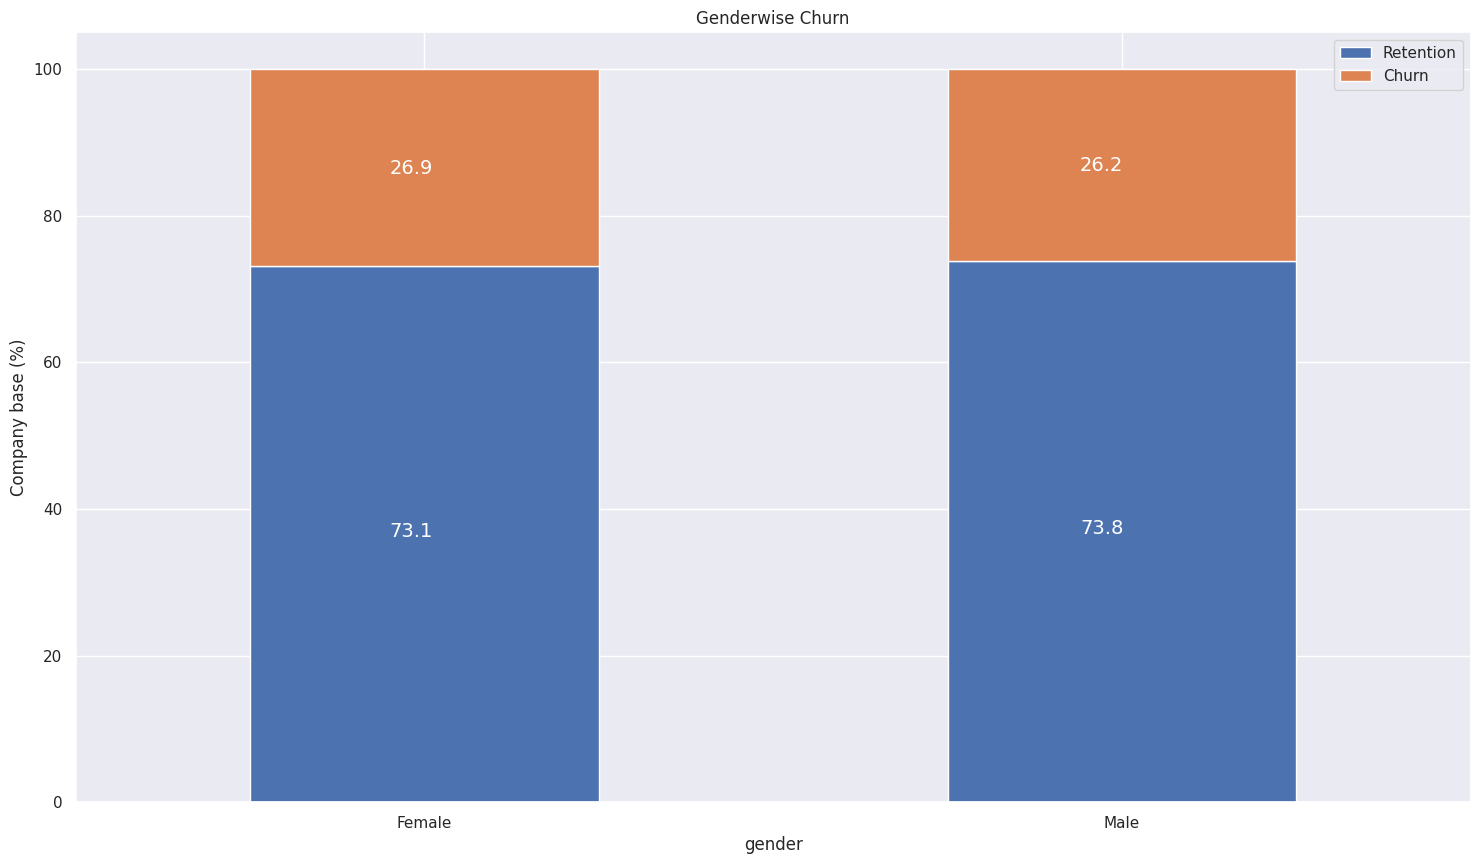

In [37]:
plot_stacked_bars(Customer_genderChurn, 'Genderwise Churn', rot_=0)

Both genders have equal churn percentage.

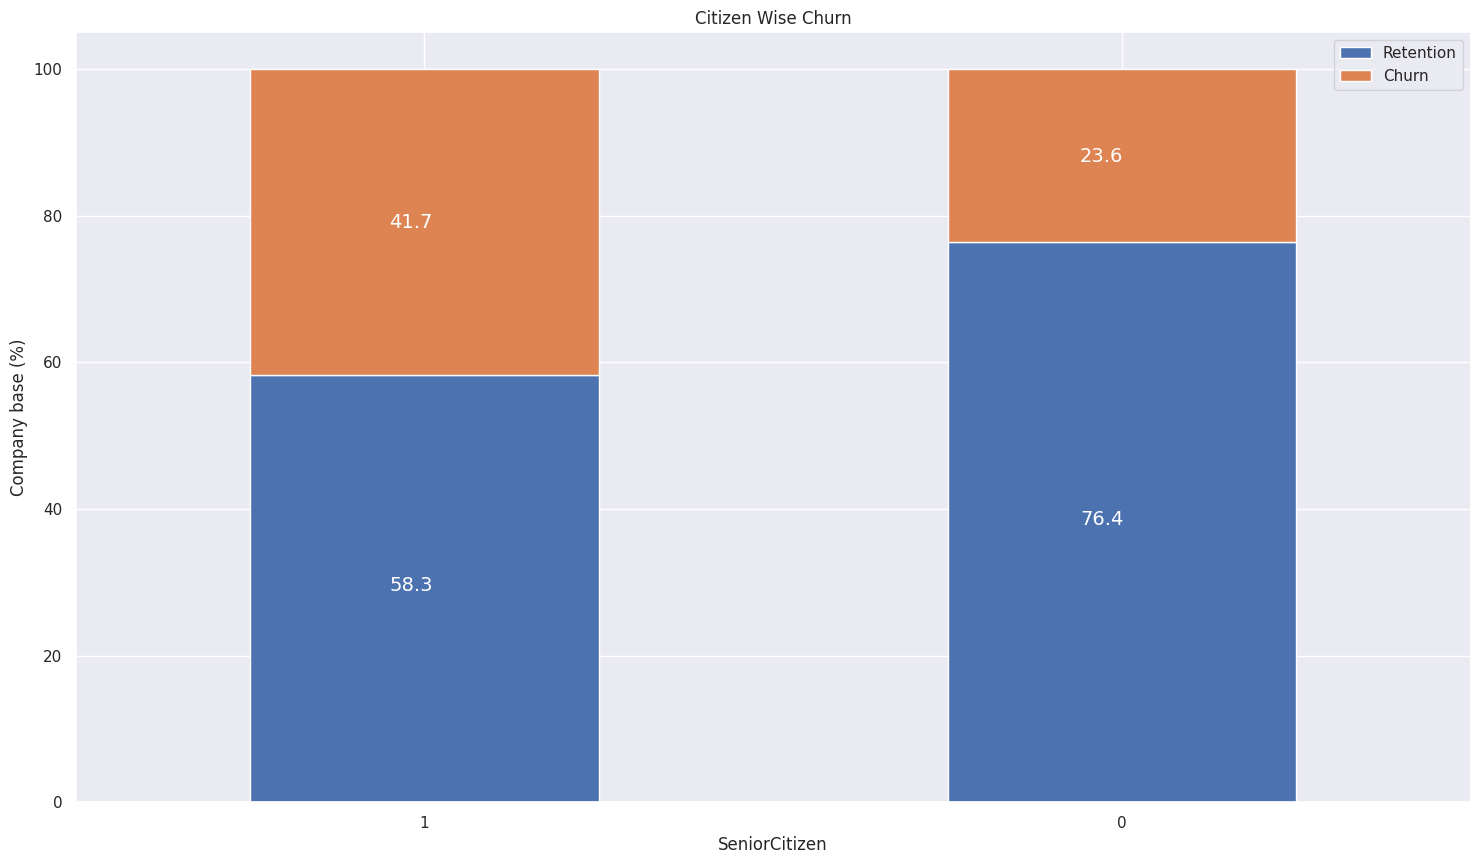

In [38]:
plot_stacked_bars(Customer_citizenChurn, 'Citizen Wise Churn', rot_=0)

In [39]:
# List of features to analyze
service_info = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Initialize a dictionary to store churn percentages for each column
churn_percentages = {}

# Calculate churn percentages for each column
for column in service_info:
    # Group the data by the current column and 'Churn' and count the number of customers in each category
    churn_counts = data.groupby([column, 'Churn'])['customerID'].count()

    # Unstack the data to make it more readable
    churn_counts = churn_counts.unstack(level=-1).fillna(0)

    # Calculate the churn percentage
    churn_percentage = (churn_counts['Yes'] / (churn_counts['Yes'] + churn_counts['No'])) * 100

    # Store the churn percentage in the dictionary
    churn_percentages[column] = churn_percentage


# Create histogram-like bar plots for each column
for column, percentage in churn_percentages.items():
    # Create a bar plot with 'Churn Percentage' on the y-axis
    fig_bar = px.bar(x=percentage.index, y=percentage.values, labels={'x': column, 'y': 'Churn Percentage'},
                     title=f'Churn Percentage for {column} (Histogram-Like Bar Plot)')

    fig_bar.show()

###Billing History

In [40]:
 # Create a histogram for MonthlyCharges and TotalCharges
fig_charges = px.histogram(data, x='MonthlyCharges', color='Churn', title='Churn vs. Monthly Charges')
fig_total_charges = px.histogram(data, x='TotalCharges', color='Churn', title='Churn vs. Total Charges')

# Create a bar plot for PaperlessBilling
fig_paperless_billing = px.bar(data, x='PaperlessBilling', color='Churn', barmode='group', title='Churn vs. Paperless Billing')

# Create a bar plot for PaymentMethod
fig_payment_method = px.bar(data, x='PaymentMethod', color='Churn', barmode='group', title='Churn vs. Payment Method')

fig_charges.show()
fig_total_charges.show()
fig_paperless_billing.show()
fig_payment_method.show()

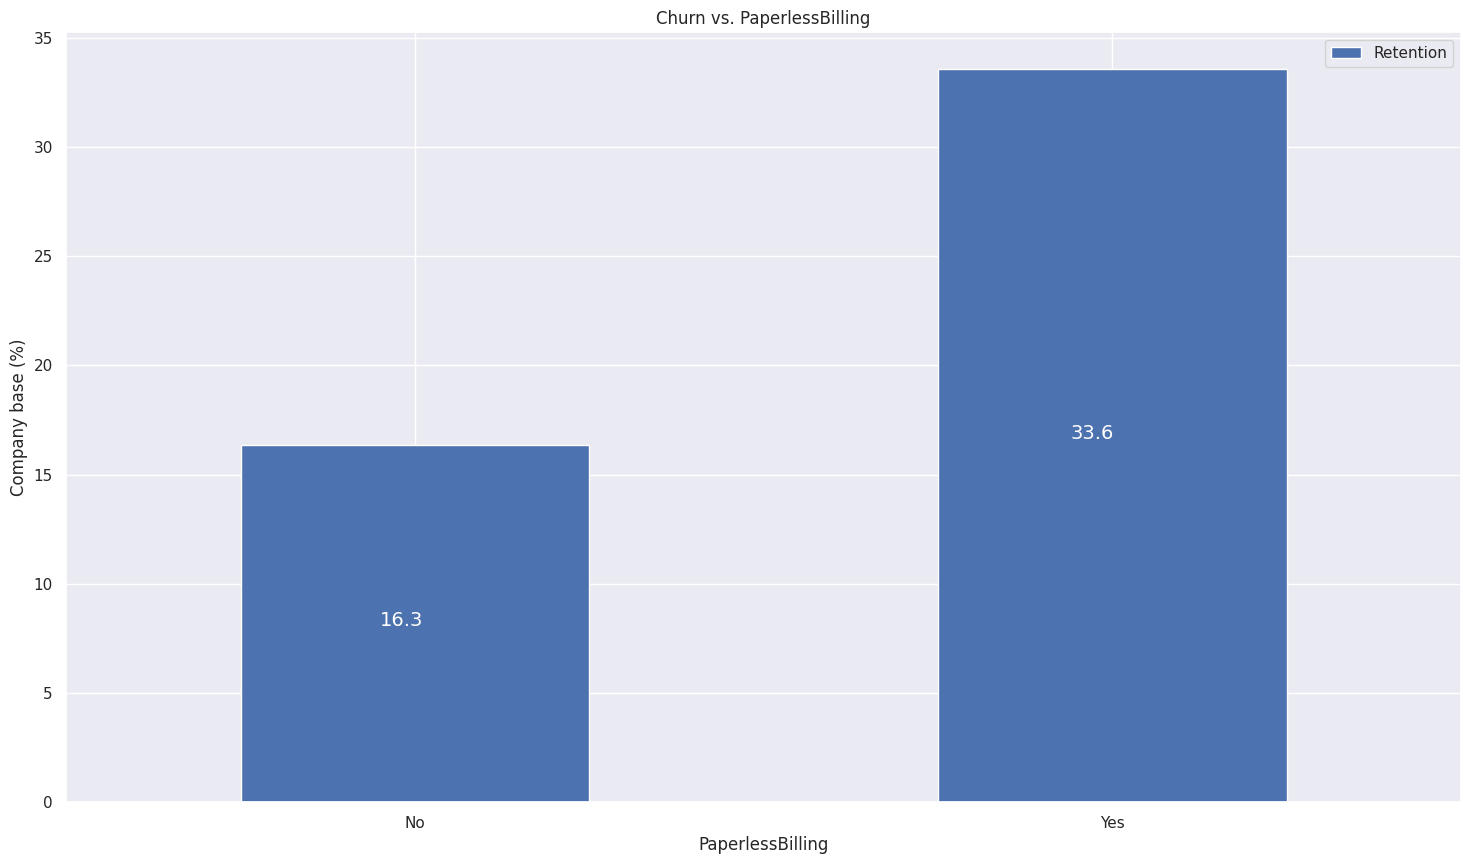

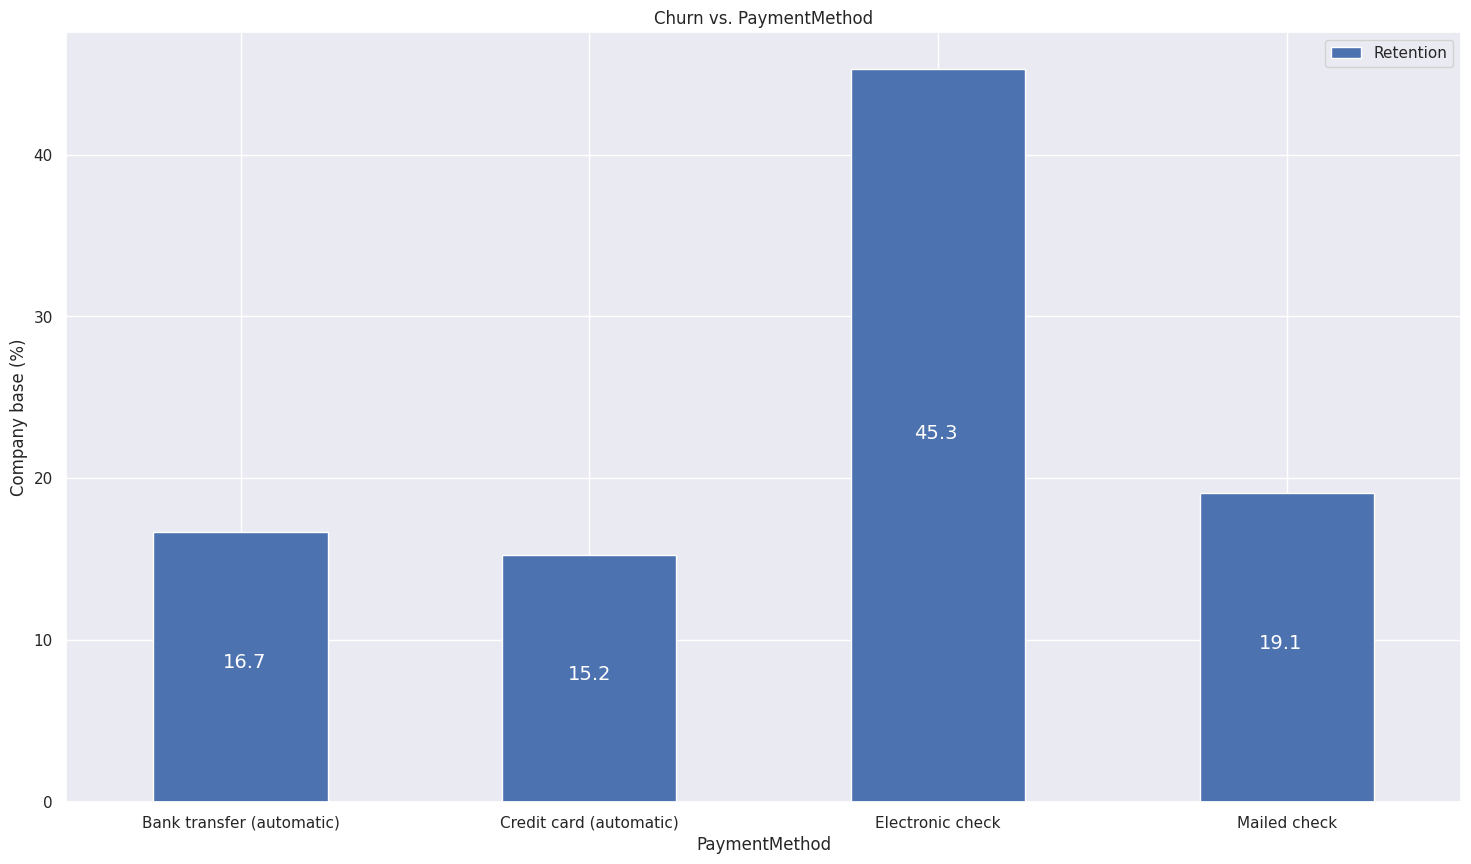

In [41]:
# Calculate churn percentages for PaperlessBilling
paperless_billing_churn = data.groupby(['PaperlessBilling', 'Churn'])['customerID'].count().unstack(level=-1).fillna(0)
paperless_billing_churn_percentage = (paperless_billing_churn['Yes'] / (paperless_billing_churn['Yes'] + paperless_billing_churn['No'])) * 100

# Calculate churn percentages for PaymentMethod
payment_method_churn = data.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack(level=-1).fillna(0)
payment_method_churn_percentage = (payment_method_churn['Yes'] / (payment_method_churn['Yes'] + payment_method_churn['No'])) * 100

# Create DataFrames for plotting
paperless_billing_df = pd.DataFrame(paperless_billing_churn_percentage)
payment_method_df = pd.DataFrame(payment_method_churn_percentage)

# Plot stacked bar charts for PaperlessBilling and PaymentMethod
plot_stacked_bars(paperless_billing_df, title_='Churn vs. PaperlessBilling')
plot_stacked_bars(payment_method_df, title_='Churn vs. PaymentMethod')

# Plot variable distribution for MonthlyCharges and TotalCharges (example usage of plot_distribution function)
plot_distribution(data, 'MonthlyCharges', title='Distribution of Monthly Charges')
plot_distribution(data, 'TotalCharges', title='Distribution of Total Charges')

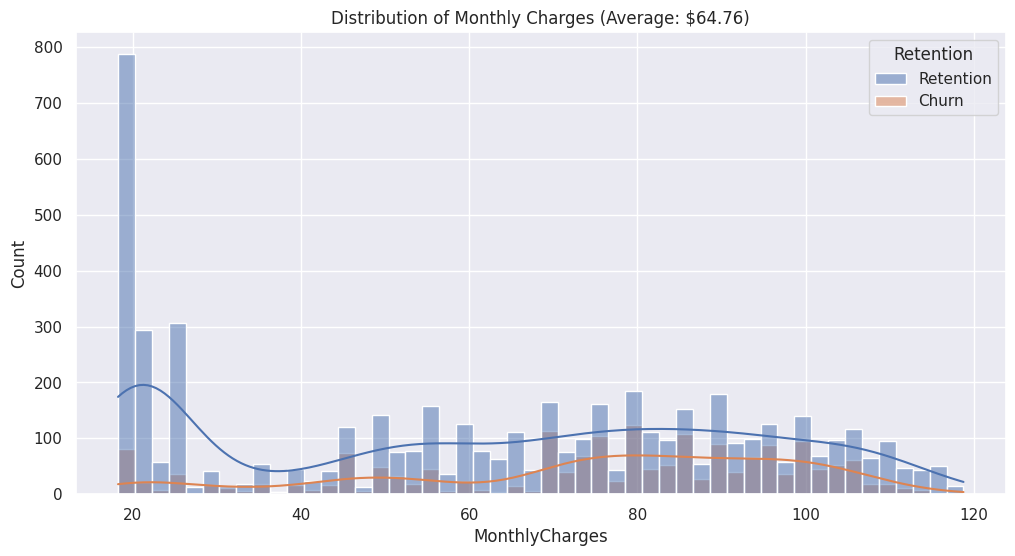

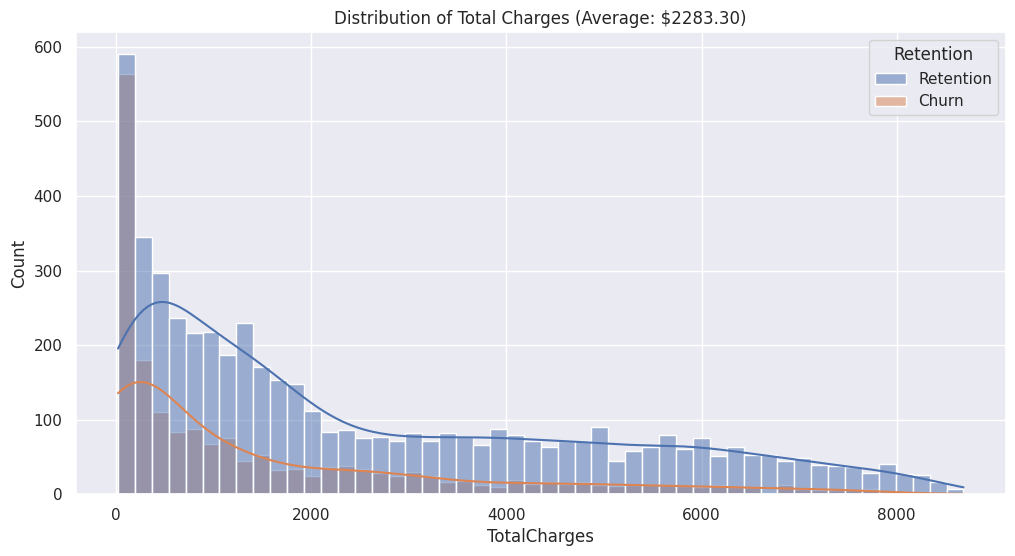

In [42]:
# Convert 'TotalCharges' column to numeric, and handle non-numeric values as NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate the average monthly charges for all customers
average_monthly_charges = data['MonthlyCharges'].mean()

# Calculate the average total charges for all customers
average_total_charges = data['TotalCharges'].mean()

# Calculate the percentage of the average monthly charges
percentage_average_monthly_charges = (average_monthly_charges / data['MonthlyCharges'].mean()) * 100

# Calculate the percentage of the average total charges
percentage_average_total_charges = (average_total_charges / data['TotalCharges'].mean()) * 100

# Create a copy of the data with 'Retention' and 'Churn' columns for visualizations
data['Retention'] = data['Churn'].apply(lambda x: 'Retention' if x == 'No' else 'Churn')

# Create a histogram-like bar plot for monthly charges
plt.figure(figsize=(12, 6))
sns.histplot(data, x='MonthlyCharges', hue='Retention', bins=50, kde=True)
plt.title(f'Distribution of Monthly Charges (Average: ${average_monthly_charges:.2f})')
plt.show()

# Create a histogram-like bar plot for total charges
plt.figure(figsize=(12, 6))
sns.histplot(data, x='TotalCharges', hue='Retention', bins=50, kde=True)
plt.title(f'Distribution of Total Charges (Average: ${average_total_charges:.2f})')
plt.show()

#Data Preprocessing

###Missing Values

In [43]:
# # Missing Observation Analysis
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Retention            0
dtype: int64

In [44]:
# Handling missing values in Total Charges.
data['TotalCharges'] = data['TotalCharges'].mean()
data['TotalCharges'].fillna(data['TotalCharges'], inplace=True)

##Outliers

In [45]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [46]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [47]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(data, [var]),  "Outliers")

tenure has  None Outliers
MonthlyCharges has  None Outliers
TotalCharges has  None Outliers


#Feature Engineering

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###**1. Replacing the Yes, No to 1 and 0**
let's replace the "Yes" and "No" values of the data with 1 and 0.

In [49]:
columns = ['gender','Partner', 'Dependents', 'PaymentMethod','PhoneService', 'PaperlessBilling', 'Churn']

# Use the replace method to change values in the specified columns
data[columns] = data[columns].replace({"Yes": 1, "No": 0})

In [50]:
gender_columns = ['gender']

# Use the replace method to change values in the specified columns
data[gender_columns] = data[gender_columns].replace({"Male": 1, "Female": 0})

###Label Encodig:
Let's perform label encoding to rest of the categorical variables.

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

##Scalling
We use the robust scaler for the outliers.

In [52]:
# Removing variables that will not affect the dependent variable
data = data.drop(columns=['customerID'])
data = data.drop(columns=['Retention'])

In [53]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [54]:
new_cols_ohe = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
like_num = [col for col in data.columns if data[col].dtypes != 'O' and len(data[col].value_counts()) <= 10]
cols_need_scale = [col for col in data.columns if col not in new_cols_ohe
                   and col not in "Churn"
                   and col not in like_num]

for col in cols_need_scale:
    data[col] = robust_scaler(data[col])

In [55]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-0.609,0,1,0,0,2,0,0,0,0,0,1,2,-0.745,2283.300441,0
1,1,0,0,0,0.109,1,0,0,2,0,2,0,0,0,1,0,3,-0.247,2283.300441,0
2,1,0,0,0,-0.587,1,0,0,2,2,0,0,0,0,0,1,3,-0.304,2283.300441,1
3,1,0,0,0,0.348,0,1,0,2,0,2,2,0,0,1,0,0,-0.516,2283.300441,0
4,0,0,0,0,-0.587,1,0,1,0,0,0,0,0,0,0,1,2,0.006,2283.300441,1


#Modelling

In [58]:
# Data Preparation:
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models for Classification
models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVM', SVC(probability=True)),  # Enable probability for AUC-ROC
    ('GB', GradientBoostingClassifier()),
    ("LightGBM", LGBMClassifier())]

# Hyperparameter Tuning for LightGBM
lgbm_params = {
    'colsample_bytree': [0.5, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6],
    'n_estimators': [200, 500],
    'num_leaves': [31, 100]  # Add more values if needed
}
lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, n_jobs=-1)
lgbm_grid.fit(X, y)
lgbm_tuned = lgbm_grid.best_estimator_

# Hyperparameter Tuning for Gradient Boosting
gbm_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]  # Add more values if needed
}
gbm_grid = GridSearchCV(GradientBoostingClassifier(), gbm_params, cv=5)
gbm_grid.fit(X, y)
gbm_tuned = gbm_grid.best_estimator_

# Ensemble Learning (Voting and Stacking)
ensemble_models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVM', SVC(probability=True)),
    ('GB', GradientBoostingClassifier()),
    ("LightGBM", lgbm_tuned),  # Use the tuned LGBM model
    ("Stacking", StackingClassifier(estimators=[('GB', gbm_tuned), ('RF', RandomForestClassifier())], final_estimator=LogisticRegression())),
]

# Results and Evaluation
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    print(f"{name}: Mean Accuracy={cv_results.mean():.4f}, Std Dev={cv_results.std():.4f}")

[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [59]:
# Model Evaluation for Gradient Boosting
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred, y_test)

print("True Positive:", conf_mat[1, 1])
print("True Negative:", conf_mat[0, 0])
print("False Positive:", conf_mat[0, 1])
print("False Negative:", conf_mat[1, 0])

True Positive: 203
True Negative: 941
False Positive: 170
False Negative: 95


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



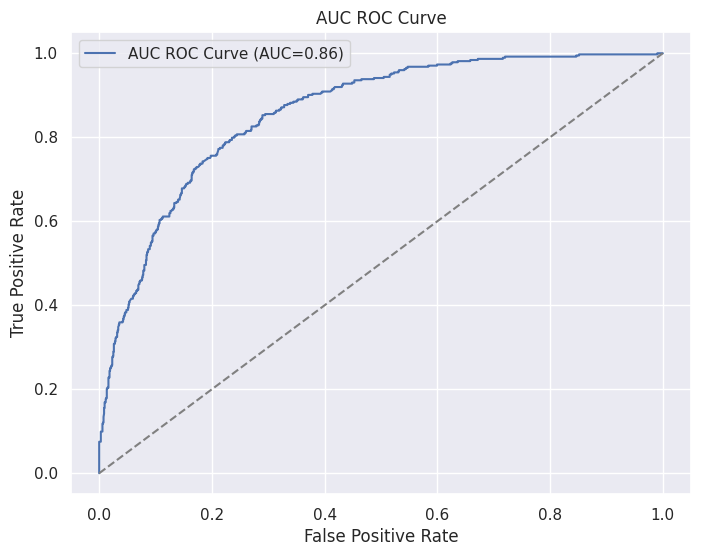

In [61]:
# AUC ROC Curve for Gradient Boosting (You can use a similar function for other models)
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC ROC Curve (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.legend(loc="best")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC ROC Curve")
    plt.show()

generate_auc_roc_curve(model_GB, X_test)

#Model Tunning

In [62]:
# LightGBM:
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500,
  'num_leaves' : 100}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [63]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [64]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

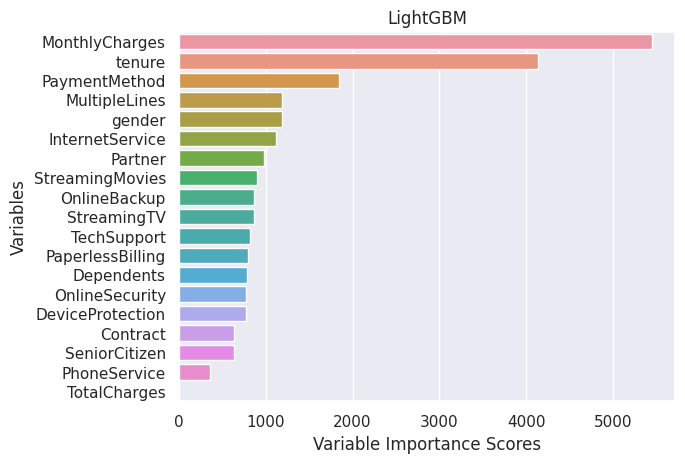

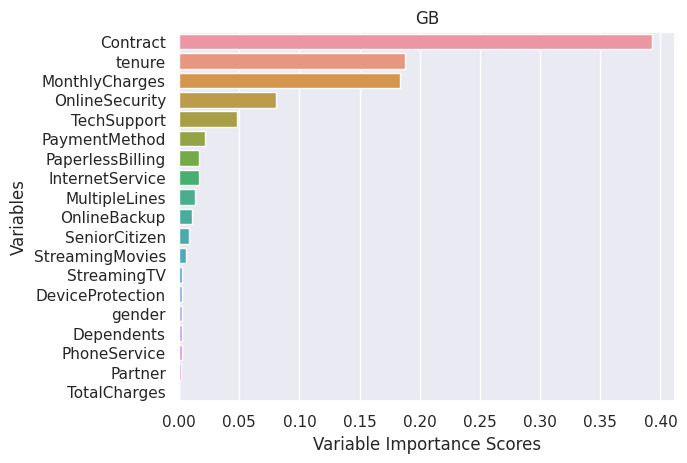

In [65]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Variable Importance Scores')
        plt.ylabel('Variables')
        plt.title(name)
        plt.show()

In [66]:
data.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,1,0,0,0,0.196,1,0,1,0,0,0,0,0,0,0,1,1,-0.016,2283.300441,0
7034,0,0,0,0,0.826,1,2,1,2,2,2,0,2,0,0,1,1,0.600,2283.300441,1
7035,1,0,0,0,-0.217,1,0,1,0,0,0,0,2,0,0,1,0,0.154,2283.300441,0
7036,0,0,0,0,-0.370,0,1,0,0,2,2,2,2,2,1,0,2,-0.178,2283.300441,0
7037,0,0,0,0,0.935,1,0,2,1,1,1,1,1,1,2,1,0,-0.905,2283.300441,0
7038,1,0,1,1,-0.109,1,2,0,2,0,2,2,2,2,1,1,3,0.266,2283.300441,0
7039,0,0,1,1,0.935,1,2,1,0,2,2,0,2,2,1,1,1,0.604,2283.300441,0
7040,0,0,1,1,-0.391,0,1,0,2,0,0,0,0,0,0,1,2,-0.750,2283.300441,0
7041,1,1,1,0,-0.543,1,2,1,0,0,0,0,0,0,0,1,3,0.075,2283.300441,1
7042,1,0,0,0,0.804,1,0,1,2,0,2,2,2,2,2,1,0,0.649,2283.300441,0
